### Центральная предельная теорема своими руками

В этом задании проверим работу центральной предельной теоремы, а также поработаем с генерацией случайных чисел и построением графиков в Питоне. 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Выбираем любимое непрерывное распределение. Для целей данного задания подойдет <a href='https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0'>распределение Лапласа</a>.<br>


In [3]:
rv = sts.laplace(loc=0, scale=1)

Сгенерируем выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины.

In [4]:
sample = rv.rvs(1000)

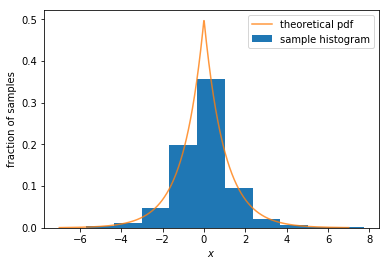

In [5]:
plt.hist(sample, density='normed', label='sample histogram')
plt.ylabel('fraction of samples')
plt.xlabel('$x$');

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-7,7,1000)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.8)
plt.legend();

Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних. 

In [6]:
n_means = []
for n in [5, 10, 50]:
    sample = rv.rvs(size=(n, 1000))
    n_means.append(np.mean(sample, axis=0))

In [7]:
n_means = np.array(n_means)

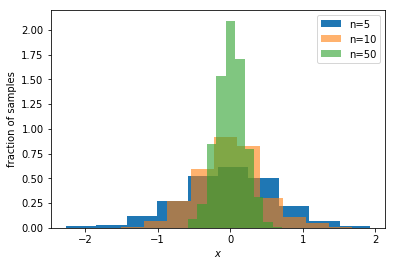

In [8]:
plt.hist(n_means[0], density='normed', label='n=5')
plt.hist(n_means[1], density='normed', label='n=10', alpha=0.6)
plt.hist(n_means[2], density='normed', label='n=50', alpha=0.6)
plt.ylabel('fraction of samples')
plt.legend()
plt.xlabel('$x$');

Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.<br>
Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

<b>Математическое ожидание</b> равно $\beta$ = 0 <br>
<b>Дисперсия</b> равна $\frac{2}{\alpha^{2}}$ = 1 <br>